# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [11]:
data=pd.read_csv('exch_rates.csv')
data.set_index(pd.to_datetime(data.Frequency),inplace=True)
data.drop(columns='Frequency',inplace=True)
data.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6905 entries, 2000-01-01 to 2018-11-26
Data columns (total 4 columns):
Frequency            6905 non-null object
Euro                 4838 non-null float64
Australian Dollar    4838 non-null float64
Danish Krone         4838 non-null float64
dtypes: float64(3), object(1)
memory usage: 269.7+ KB


Plot the three exchange rates in one plot

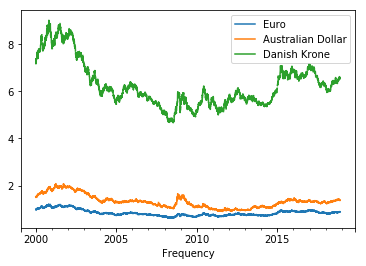

In [12]:
data.plot();

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [13]:
data.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

The exchange rates all seem correlated with each other.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

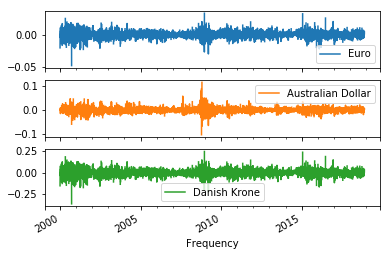

In [14]:
diff_data = data.diff(periods=1)
diff_data.plot(subplots=True);

### Explain what's going on

Even though the exchange rates might be at different means the noise fluctuations around this mean seem to be extremely correlated for all three.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

,Euro,Euro
Euro,1.000000,0.999146
Euro,0.999146,1.000000


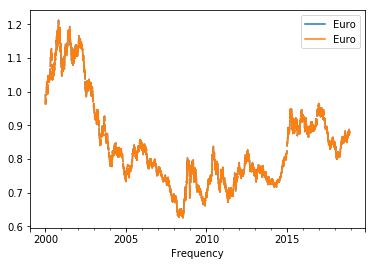

In [15]:
EUR = data[['Euro']]
EUR_shift= EUR.shift(periods=1)
EUR_1 = pd.concat([EUR,EUR_shift],axis=1)
EUR_1.plot();
EUR_1.corr()

Repeat this, but for a "lag 5 autocorrelation"

,Euro,Euro
Euro,1.000000,0.997518
Euro,0.997518,1.000000


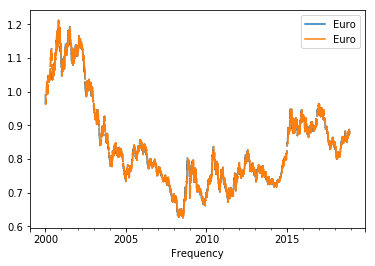

In [16]:
EUR_shift= EUR.shift(periods=5)
EUR_5 = pd.concat([EUR,EUR_shift],axis=1)
EUR_5.plot();
EUR_5.corr()

In [ ]:
# your code here

### What's your conclusion here?

The Euro exchange rate seems to be extremely autocorrelated at least up to lag 5.

Knowing this, let's plot the ACF now.

In [34]:
EUR.fillna(method='backfill',inplace=True)

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [25]:
EUR.fillna(method='backfill')

,Euro
Frequency,
2000-01-01,0.991080
2000-01-02,0.991080
2000-01-03,0.991080
2000-01-04,0.970403
2000-01-05,0.964506
2000-01-06,0.962649
2000-01-07,0.972384
2000-01-08,0.977613
2000-01-09,0.977613


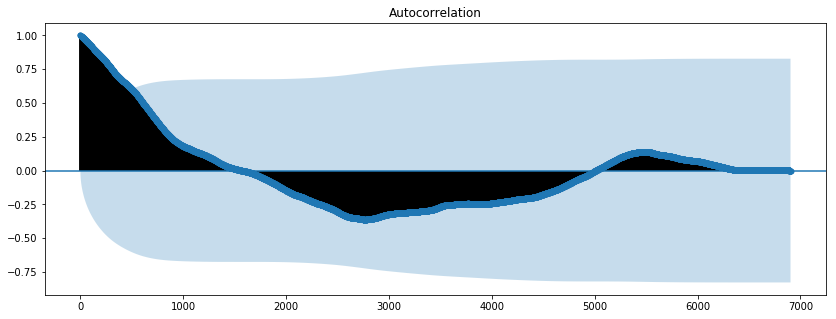

In [39]:
plot_acf(EUR);

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

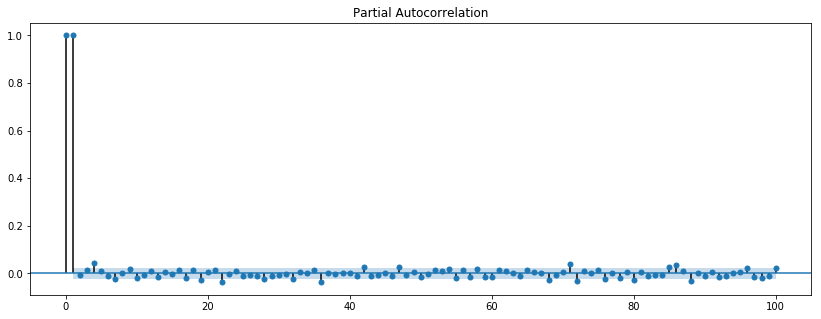

In [42]:
plot_pacf(EUR,lags=100);

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [43]:
pass_data = pd.read_csv('passengers.csv')
pass_data.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [45]:
pass_data.set_index(pd.to_datetime(pass_data.Month),inplace=True)
pass_data.drop(columns='Month',inplace=True)
pass_data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [67]:
pass_data.dropna(inplace=True);

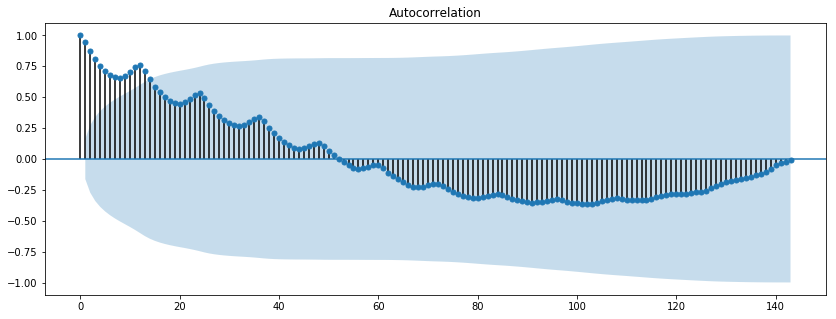

In [68]:
plot_acf(pass_data);

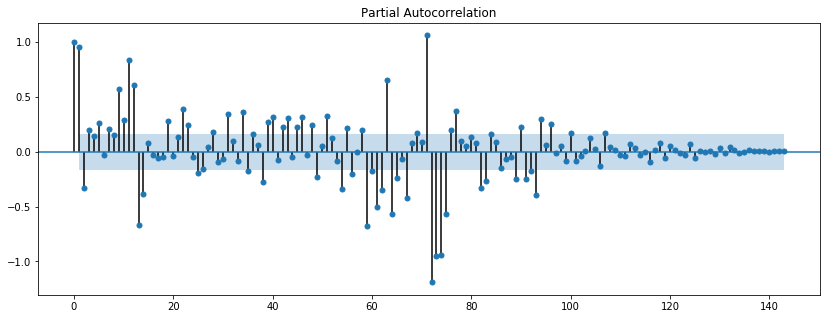

In [73]:
plot_pacf(pass_data,method='ols');

In [70]:
pass_diff=pass_data.diff(periods=1).dropna()

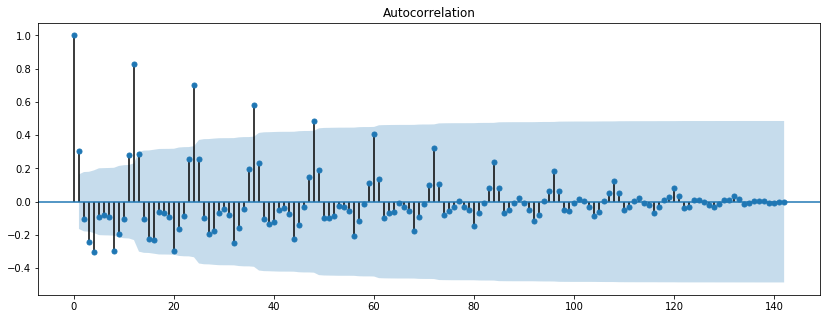

In [75]:
plot_acf(pass_diff);

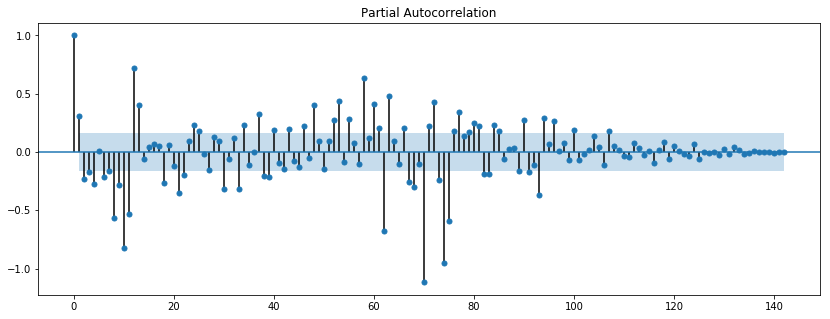

In [76]:
plot_pacf(pass_diff,method='ols');

### Your conclusion here

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [54]:
nyse_data = pd.read_csv('NYSE_monthly.csv')
nyse_data.set_index(pd.to_datetime(nyse_data.Month),inplace=True)
nyse_data.drop(columns='Month',inplace=True)
nyse_data.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


In [64]:
nyse_data.dropna(inplace=True)

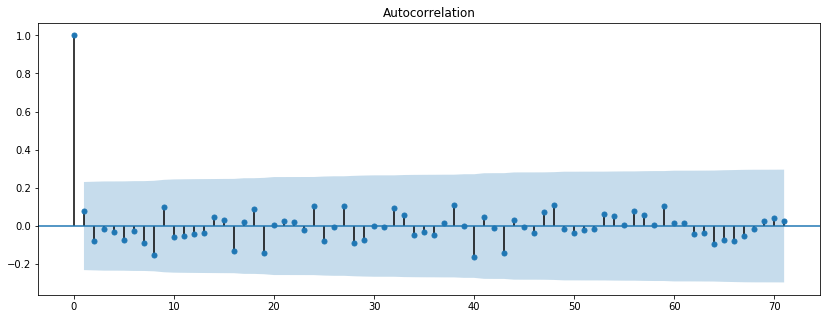

In [65]:
plot_acf(nyse_data);

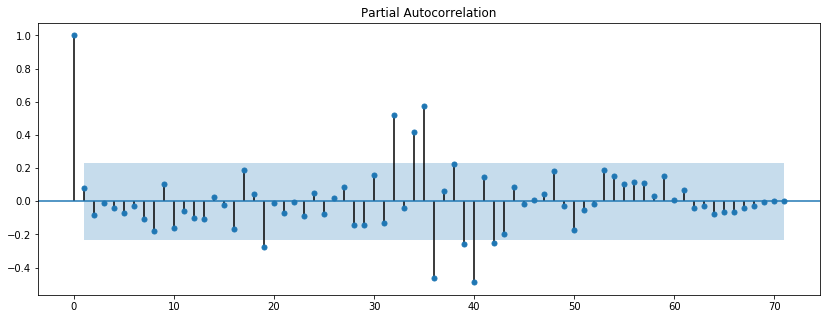

In [77]:
plot_pacf(nyse_data,method='ols');

## Your conclusion here



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!